(-6, 8)

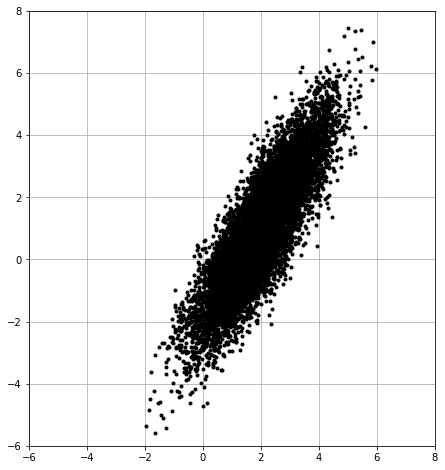

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes stretched by unit

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints)) 
#So we created a 10,000 non-centered data that is normally distributed 

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', Color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))


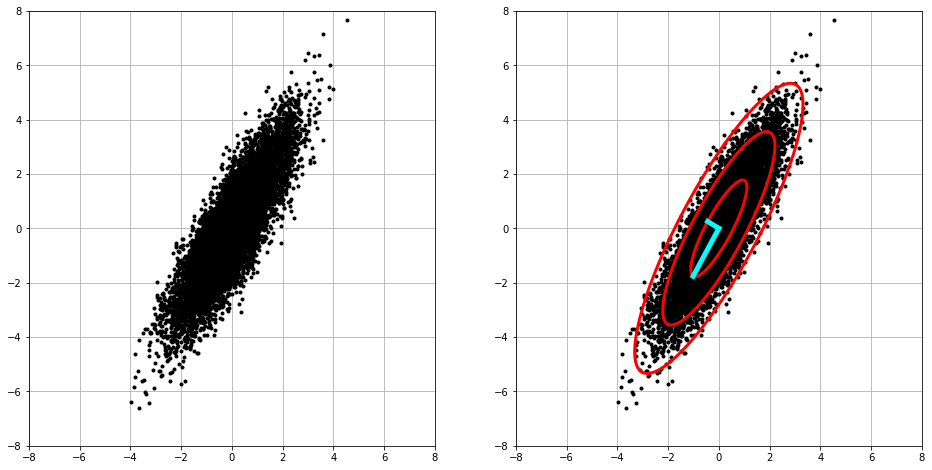

In [3]:
#Find the B, mean subtracted data
Xavg = np.mean(X,axis=1)                  # Compute mean
B = (X - np.tile(Xavg,(nPoints,1)).T)       # Mean-subtracted data
# NormB = (B - np.tile(np.mean(B,axis=1),(10000,1)).T)/(np.tile(np.std(B,axis=1),(10000,1)).T)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(B[0,:],B[1,:], '.', Color='k')
ax1.grid()
plt.xlim((-8,8))
plt.ylim((-8,8))

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B,full_matrices=0)      

ax2 = fig.add_subplot(122)
ax2.plot(B[0,:],B[1,:], '.', Color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-8,8))
plt.ylim((-8,8))

theta = 2 * np.pi * np.arange(0,1,0.01) # Unit circle to plot the confidence intervals

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])/np.sqrt(nPoints) #So we can visualize the confidence intervals

ax2.plot(Xstd[0,:],Xstd[1,:],'-',color='r',LineWidth=3)
ax2.plot(2*Xstd[0,:],2*Xstd[1,:],'-',color='r',LineWidth=3)
ax2.plot(3*Xstd[0,:],3*Xstd[1,:],'-',color='r',LineWidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([0, U[0,0]*S[0]])/np.sqrt(nPoints),
         np.array([0, U[1,0]*S[0]])/np.sqrt(nPoints),'-',color='cyan',LineWidth=5)
ax2.plot(np.array([0, U[0,1]*S[1]])/np.sqrt(nPoints),
         np.array([0, U[1,1]*S[1]]/np.sqrt(nPoints)),'-',color='cyan',LineWidth=5)

plt.show()